In [48]:
import pandas as pnd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [49]:
Topic=pnd.read_csv('spam_base.names', skiprows=32, sep=':\s+', engine='python', names=['attr',''])
Topic=Topic['attr']
Topic= list(Topic)
Topic.append('spam_type')
Topic

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 '

In [50]:
Data=pnd.read_csv('spam_base.data', names=Topic, header=None)

In [51]:
print(Data.head)

<bound method NDFrame.head of       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32         

In [52]:
Data.describe

<bound method NDFrame.describe of       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32     

In [6]:
print('Cleaning data')

Cleaning data


In [53]:
print(Data.duplicated().value_counts())

False    4210
True      391
dtype: int64


In [54]:
Data = Data.drop_duplicates()

In [55]:
Data.head

<bound method NDFrame.head of       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32         

In [56]:
Data.isna().sum().sum()

0

In [57]:
x = Data.drop(columns=['spam_type'])
x

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [58]:
y = Data['spam_type']
y

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: spam_type, Length: 4210, dtype: int64

In [63]:
x_trains, x_tests, y_trains, y_tests = train_test_split(x, y, random_state=1, test_size=0.2)

In [64]:
scaler = StandardScaler()
scaler.fit(x)
scaled_data = scaler.transform(x_trains)

X_test_scaled = scaler.transform(x_tests)

In [72]:
from sklearn.decomposition import PCA

PCA = PCA()
x_PCA = PCA.fit_transform(scaled_data)

Text(0, 0.5, 'Variance')

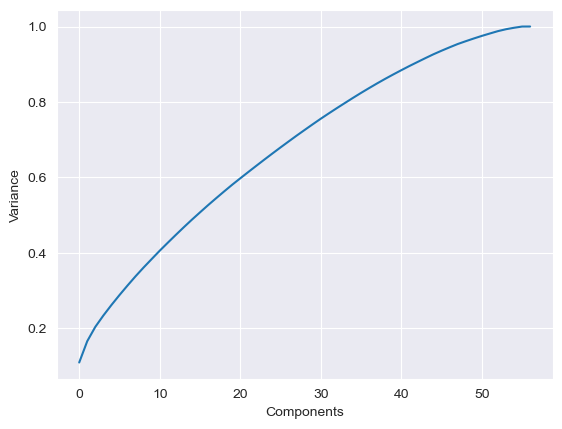

In [73]:
import matplotlib.pyplot as plot
import numpy as nup

plot.plot(nup.cumsum(PCA.explained_variance_ratio_))
plot.xlabel('Components')
plot.ylabel('Variance')

In [99]:
from sklearn.decomposition import PCA
PCA = PCA(n_components=57)
x_PCA = PCA.fit(scaled_data)
x_test_PCA = PCA.fit(X_test_scaled)

In [100]:
x_PCA = PCA.transform(scaled_data)
x_test_PCA = PCA.transform(X_test_scaled)

print(scaled_data.shape)
print(x_PCA.shape)

(3368, 57)
(3368, 57)


In [101]:
x_PCA

array([[ 0.66788853, -0.52225765, -1.93340277, ..., -0.0371554 ,
        -0.00900181, -0.00297142],
       [-0.08851872, -0.3508324 , -0.69348072, ..., -0.02710488,
        -0.03009548,  0.00660388],
       [-0.63387234, -0.40637981, -0.84777608, ..., -0.0099733 ,
        -0.16708454, -0.00229139],
       ...,
       [-1.41124518,  0.29351323,  2.14947507, ..., -0.03400446,
        -0.17650374,  0.00751696],
       [-0.70094758, -0.06781207, -0.08598569, ..., -0.0497221 ,
         0.08539106,  0.00909165],
       [-1.38802812,  0.04427952,  2.12056569, ..., -0.13674368,
         0.01818769, -0.00979952]])

In [102]:
x_test_PCA

array([[ 1.26005348e+00, -1.72631950e-01, -1.30142312e-01, ...,
         5.20701657e-03, -1.83660946e-02, -1.65647524e-03],
       [-1.09385581e+00,  4.05856734e-02,  1.20118213e+00, ...,
         3.41764576e-02,  6.09303927e-02,  5.08237465e-03],
       [-9.33293309e-01, -1.96215485e-02, -1.32341030e-02, ...,
        -5.80595514e-02,  2.73829863e-03,  1.10266405e-02],
       ...,
       [-2.43500737e-01, -5.71159875e-01, -2.21430880e+00, ...,
        -2.02601295e-01, -1.28889834e-02,  3.98281339e-05],
       [ 6.54406104e+00,  1.17970724e-01,  8.79812349e-01, ...,
         1.88092584e-02,  2.16663166e-02, -1.57401820e-02],
       [-1.54680219e+00,  7.91926168e-02,  2.41569693e+00, ...,
        -3.73270307e-02,  1.45706485e-01, -4.08456076e-03]])

Text(0, 0.5, '2nd pca component')

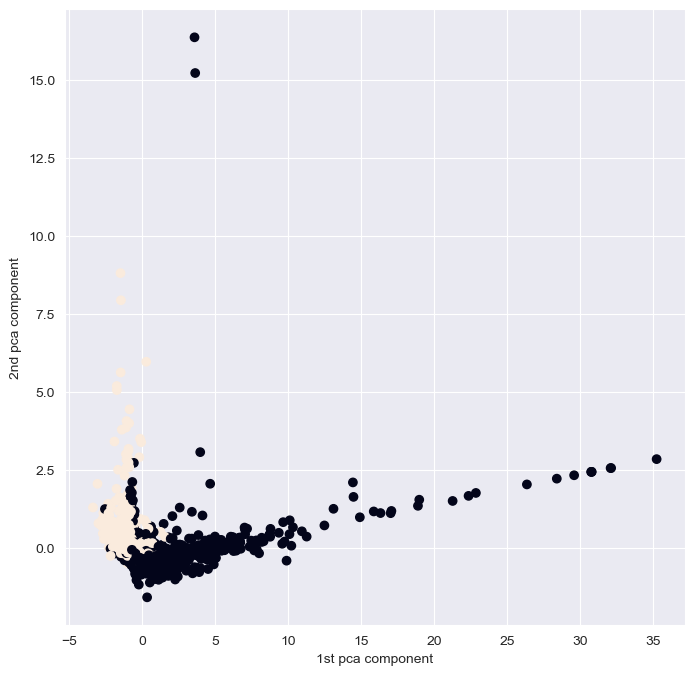

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
plt.scatter(x_PCA[:,0],x_PCA[:,1], c= y_trains)
plt.xlabel('1st pca component')
plt.ylabel('2nd pca component')

In [104]:
stand_X=StandardScaler()
x_trains = stand_X.fit_transform(x_trains)
x_tests = stand_X.transform(x_tests)

In [105]:
len(y_tests)

842

In [106]:
import math
print(math.sqrt(len(y_tests)))

29.017236257093817


In [107]:
Classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

KNN= KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [108]:
Classifier.fit(x_trains,y_trains)

KNeighborsClassifier(metric='euclidean')

In [109]:
KNN.fit(x_trains, y_trains)

KNeighborsClassifier(metric='euclidean')

In [110]:
predicted_y= Classifier.predict(x_tests)
predicted_y

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,

In [113]:
PCA_predict_y =KNN.predict(x_test_PCA)
PCA_predict_y

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,

In [125]:
ConfusionMatrix = confusion_matrix(y_tests,predicted_y)
print(ConfusionMatrix)

[[478  41]
 [ 49 274]]


In [126]:
PCA_ConfusionMatrix = confusion_matrix(y_tests,PCA_predict_y)
print(PCA_ConfusionMatrix)

[[410 109]
 [223 100]]


<Axes: >

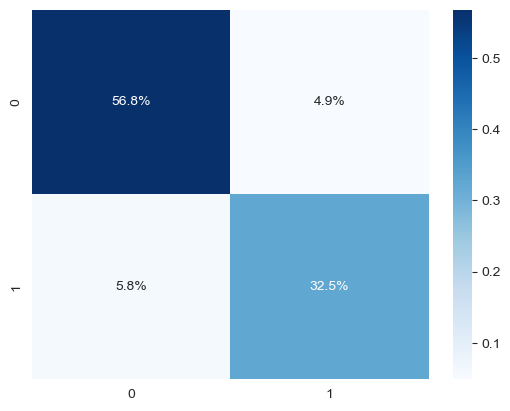

In [127]:
import seaborn as sns
import numpy as num
sns.heatmap(ConfusionMatrix/num.sum(ConfusionMatrix), annot=True,
            fmt='.1%', cmap='Blues')

In [128]:
f1Score_KNN= f1_score(y_tests,predicted_y)
f1Score_KNN

0.8589341692789968

In [129]:
f1Score_KNN_PCA= f1_score(y_tests,predicted_y)
f1Score_KNN_PCA

0.8589341692789968

In [131]:
KNN_Accuracy = accuracy_score(y_tests,predicted_y)
KNN_Accuracy

0.8931116389548693

In [132]:
PCA_KNN_Accuracy = accuracy_score(y_tests,PCA_predict_y)
PCA_KNN_Accuracy

0.6057007125890737

DT

In [134]:
DecisionTreeClassifier= DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=29, min_samples_leaf=57)
DecisionTreeClassifier.fit(x_trains,y_trains)

DecisionTreeClassifier(criterion='entropy', max_depth=29, min_samples_leaf=57,
                       random_state=1)

In [136]:
Predicted_DT_Y = DecisionTreeClassifier.predict(x_tests)
Predicted_DT_Y

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,

In [137]:
DT_ConfusionMatrix = confusion_matrix(y_tests,Predicted_DT_Y)
print(DT_ConfusionMatrix)

[[466  53]
 [ 46 277]]


In [140]:
f1Score_DecisionTree= f1_score(y_tests,Predicted_DT_Y)
f1Score_DecisionTree

0.8483920367534455

In [141]:
DecisionTree_Accuracy = accuracy_score(y_tests,Predicted_DT_Y)
DecisionTree_Accuracy

0.8824228028503563